# Introduction to Scikit Learn (sklearn)

This notebook demonstrates some of the most useaful functions of the DScikit Learn library.
What we're going to cover:
0. End-to-end Scikit Learn workflow.
1. Get data ready.
2. Choose the right estimator/algorithm for our problems.
3. Fit the model/algorithm and use it to make predictions on our data.
4. Evaluating a model.
5. Improve a model.
6. Save and load a trained model.
7. Putting it all together.

In [1]:
#Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 0. An end-to-end Scikit Learn Workflow.

In [2]:
# 1. Get the data ready
try:
    heart_disease = pd.read_csv('datasets/heart-disease.csv')
except FileNotFoundError:
    heart_disease = pd.read_csv('datasets\heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (features matrix)
X = heart_disease.drop('target', axis=1)
# Create y (labels)
y = heart_disease['target']

In [4]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fit the model to the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
clf.fit(X_train, y_train);

In [7]:
# Make a prediction

#y_label = clf.predict(np.array([0,2,3,4]))    

# The line above causes an error because a model can't make predictions on things that aren't the same shape as the data it was trained with.

In [8]:
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0])

In [9]:
y_test

286    0
214    0
1      1
37     1
110    1
      ..
204    0
237    0
124    1
54     1
238    0
Name: target, Length: 61, dtype: int64

In [10]:
# 4. Evaluate the model on the training data and the test data
clf.score(X_train, y_train)

1.0

In [11]:
clf.score(X_test, y_test)

0.7868852459016393

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.69      0.88      0.77        25
           1       0.90      0.72      0.80        36

    accuracy                           0.79        61
   macro avg       0.79      0.80      0.79        61
weighted avg       0.81      0.79      0.79        61



In [13]:
confusion_matrix(y_test, y_preds)

array([[22,  3],
       [10, 26]])

In [14]:
accuracy_score(y_test, y_preds)

0.7868852459016393

In [15]:
# 5. improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range (10,30):
    print(f'Trying model with {i} n_estimators...')
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f'Model accuracy on test set: ','{:.2f}%'.format(clf.score(X_test, y_test)*100))
    print('')

Trying model with 10 n_estimators...
Model accuracy on test set:  73.77%

Trying model with 11 n_estimators...
Model accuracy on test set:  75.41%

Trying model with 12 n_estimators...
Model accuracy on test set:  78.69%

Trying model with 13 n_estimators...
Model accuracy on test set:  81.97%

Trying model with 14 n_estimators...
Model accuracy on test set:  75.41%

Trying model with 15 n_estimators...
Model accuracy on test set:  78.69%

Trying model with 16 n_estimators...
Model accuracy on test set:  75.41%

Trying model with 17 n_estimators...
Model accuracy on test set:  73.77%

Trying model with 18 n_estimators...
Model accuracy on test set:  75.41%

Trying model with 19 n_estimators...
Model accuracy on test set:  77.05%

Trying model with 20 n_estimators...
Model accuracy on test set:  73.77%

Trying model with 21 n_estimators...
Model accuracy on test set:  80.33%

Trying model with 22 n_estimators...
Model accuracy on test set:  81.97%

Trying model with 23 n_estimators...
M

In [16]:
# 6. Save a model and load it
import pickle
pickle.dump(clf, open('random_forest_model_1.pkl','wb'))

In [17]:
loaded_model = pickle.load(open('random_forest_model_1.pkl', 'rb'))
loaded_model.score(X_test, y_test)

0.7540983606557377

## 1. Getting our data ready to be used with machine learning

There are threee main things that we have to do:

    1. Split the data into features and labels (usually 'x' and 'y')

    2. Filling (also called imputing) or disregarding missing values.

    3. Converting non-numerical values to numerical values (also called 'feature encoding')

In [18]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
X = heart_disease.drop('target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [21]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape    #shape arroja (# lineas, # columnas) de un dataframe

((242, 13), (61, 13), (242,), (61,))

In [22]:
X.shape    #shape del dataframe antes del split

(303, 13)

### 1.1 Make sure all data is numerical

In [23]:
try:
    car_sales = pd.read_csv("datasets/car-sales-extended.csv")
except FileNotFoundError:
    car_sales = pd.read_csv("datasets\car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [24]:
len(car_sales)

1000

In [25]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [26]:
#Split into X/y
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']
#Split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [27]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
#model.fit(X_train, y_train)
#model.score(X_test, y_test)

# The last two lines would cause an error because of some categories are not numerical

In [28]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(X)

In [29]:
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [30]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [31]:
pd.DataFrame(transformed_X).head()   #Necesitamos convertir el X transformado a un dataframe para compararlo con el X original.

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [32]:
# La funcion hot_one toma las categorías usadas en la tabla y les asigna un valor numerico a modo de tabla de verdad
# Convierte los valores de Make, Colour y Doors en una tabla binaria de 11 columnas, siendo la 12va columna el valor que no cambia (odometro)
dummies = pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies
#Con esta funcion de pandas se puede ver algo similar a lo que hace hot_one, pero sin tomar como categoria a 'Doors' por ser numerica

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [33]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.15, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
model.score(X_test, y_test)

0.27702253670898414

### 1.2 What if there were missing values?
1. Fill them with some value (a.k.a. imputation)
2. Remove the samples with missing data altogether

In [35]:
# Import car_sales_missing_data
try:
    car_sales_missing = pd.read_csv('datasets/car-sales-extended-missing-data.csv')
except FileNotFoundError:
    car_sales_missing = pd.read_csv('datasets\car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [36]:
# Calculate if there are missing values on a pandas dataframe
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [37]:
# Create x & y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(X)

#Versiones viejas de Scikit-Learn mostrarían un error aquí por haber valores 'NaN' en el dataframe

In [39]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


#### Option 1: fill missing data with pandas

In [40]:
#Fill the 'Make' column
car_sales_missing['Make'].fillna('missing', inplace=True)

#Fill the 'Colour' column
car_sales_missing['Colour'].fillna('missing', inplace=True)

#Fill the 'Odometer' column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

#Fill the 'Doors' column
car_sales_missing['Doors'].fillna(4, inplace=True)

#Check the dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [41]:
# Remove rows with missing price value (the value we are trying to predict)
car_sales_missing.dropna(inplace=True)

In [42]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [43]:
len(car_sales_missing)

950

In [44]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

### Option 2: Fill missing values with Scikit-Learn

In [46]:
try:
    car_sales_missing = pd.read_csv('datasets/car-sales-extended-missing-data.csv')
except FileNotFoundError:
    car_sales_missing = pd.read_csv('datasets\car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [47]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [48]:
# Drop the rows with no labels (label=output info)
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [49]:
#Split into X & y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [50]:
#Fill missing X values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with constant (either 'missing' or 4) and numerical values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_features = ['Make','Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_features),
    ('num_imputer', num_imputer, num_features)
])

#
#
# Transform the training data: ***USE FIT_TRANSFORM*** we want to fit our model ONLY with the training data.
#
# fit_transform() calculates the mean from the training data and imputes it in the missing values
#
filled_X_train = imputer.fit_transform(X_train)
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [51]:
# Check for NaN values in filled_X_train by making an array out of it plus the .isna().sum() methods of pd DataFrames
pd.DataFrame(filled_X_train).isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [52]:
#
#
# Transform the test data: ***USE TRANSFORM()*** we dont want info from the test to leak by fitting the model with it
#
# The transform() method takes the imputing missing values from the training set and fills the test set with them

filled_X_test = imputer.transform(X_test)
filled_X_test

array([['Toyota', 'Blue', 4.0, 99761.0],
       ['Toyota', 'Black', 4.0, 17975.0],
       ['Honda', 'Blue', 4.0, 197664.0],
       ['Nissan', 'Green', 4.0, 235589.0],
       ['Honda', 'Black', 4.0, 231659.0],
       ['Toyota', 'Blue', 4.0, 247601.0],
       ['Toyota', 'Green', 4.0, 110078.0],
       ['missing', 'White', 4.0, 155383.0],
       ['Nissan', 'White', 4.0, 26634.0],
       ['Honda', 'White', 4.0, 130319.03314917127],
       ['Honda', 'Green', 4.0, 238825.0],
       ['Honda', 'Green', 4.0, 37606.0],
       ['Toyota', 'Blue', 4.0, 230908.0],
       ['Toyota', 'Red', 4.0, 159925.0],
       ['Toyota', 'Blue', 4.0, 181466.0],
       ['Toyota', 'Blue', 4.0, 140465.0],
       ['Toyota', 'White', 4.0, 146307.0],
       ['Toyota', 'Green', 4.0, 214179.0],
       ['Honda', 'White', 4.0, 184869.0],
       ['Toyota', 'Black', 4.0, 224986.0],
       ['Nissan', 'White', 3.0, 176135.0],
       ['Nissan', 'Red', 4.0, 130319.03314917127],
       ['Toyota', 'Blue', 4.0, 112223.0],
       ['BM

In [53]:
# Check for NaN values in filled_X_test
pd.DataFrame(filled_X_test).isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [54]:
car_sales_training_filled = pd.DataFrame(filled_X_train,
                                        columns=['Make','Colour','Doors','Odometer (KM)'])
car_sales_test_filled = pd.DataFrame(filled_X_test,
                                    columns=['Make','Colour','Doors','Odometer (KM)'])
car_sales_training_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [55]:
car_sales_test_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [56]:
categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')

# Use 'fit_transform' method with the train set. It is equivalent to fit().transform() and we only want to fit our model with the training data (in this case, get the average used  to fill the ).
transformed_x_train = transformer.fit_transform(car_sales_training_filled)
# Use 'transform' method with the test set to avoid information leakage.
transformed_x_test = transformer.transform(car_sales_test_filled)

transformed_x_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [57]:
# Now we've got our separated training and testing data as numbers and filled (no missing values)
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# Setup model
model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_x_train, y_train)
model.score(transformed_x_test, y_test)

0.21229043336119102

## 2. Choosing the right estimator/algorithm for your problem

Some things to note:
*SkLearn refers to machine learning models, algorithms as estimators (classifiers, regressors).
*Classification problems- predicting a category (e.g. heart disease or not).
    Sometimes you'll see 'clf' (short for classifier) used as a classification estimator.
*Regression problems- predicting a number (e.g. the price of a car).

If you're working on a machine learning problem and looking to use sklearn and not sure of what modle you should use, refer to the sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression 
Let's use the California Housing Dataset

In [58]:
# Get CaliHousDataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [59]:
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [60]:
housing_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [61]:
housing_df['target'] = housing['target']
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [62]:
# Import algorithm
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model on the test set
model.score(X_test, y_test)

0.5758549611440125

In [63]:
# TRY OUT DIFFERENT MODELS

In [64]:
'''
# Trying SVR model from SVM library. SVM's run endlessly, dont use SVR's for this problem
from sklearn.svm import SVR
SVR_model = SVR(kernel='linear')
SVR_model.fit(X_train, y_train)

SVR_model.score(X_test, y_test)
'''

"\n# Trying SVR model from SVM library. SVM's run endlessly, dont use SVR's for this problem\nfrom sklearn.svm import SVR\nSVR_model = SVR(kernel='linear')\nSVR_model.fit(X_train, y_train)\n\nSVR_model.score(X_test, y_test)\n"

In [65]:
# Trying Lasso model
from sklearn.linear_model import Lasso
Lasso_model = Lasso()
Lasso_model.fit(X_train, y_train)

Lasso_model.score(X_test, y_test)

0.2841671821008396

In [66]:
# Trying ElasticNet model
from sklearn.linear_model import ElasticNet
EN_model = ElasticNet()
EN_model.fit(X_train, y_train)

EN_model.score(X_test, y_test)

0.41655189098028245

In [67]:
# Trying ensemble model (an ensemble is a combination of smaller models to try and make better predictions than just a single model)
# SkLearn ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html
from sklearn.ensemble import RandomForestRegressor

RFR_model = RandomForestRegressor()
RFR_model.fit(X_train, y_train)

RFR_model.score(X_test, y_test)

0.8067600041906792

### 2.2 Choosing an estimator for a classification problem

In [68]:
try:
    heart_disease = pd.read_csv('datasets/heart-disease.csv')
except FileNotFoundError:
    heart_disease = pd.read_csv('datasets\heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [69]:
# According to the map, for this dataset it's better to try the linear SVC model
# Map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=100000)
clf.fit(X_train, y_train)

# Evaluate model
clf.score(X_test, y_test)

/home/dav/Documents/Education/ML_and_DS/Udemy_Course/sample_project/env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8852459016393442

In [70]:
# Trying a random forest classifier to compare results
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8524590163934426

TIP:: 

    1. If you have structured data use ensemble methods.
    
    2. If you have unstructured data use deep learning or transfer learning methods.

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to data.

In [71]:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier()

# Fit the model to the data
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test, y_test)

0.8524590163934426

### 3.2 Make predictions using a machine learning model

There are two main ways to make predictions:
1. predict()
2. predict_proba()

In [72]:
# Use a trained model to make predictions

#clf.predict(np.array([1,7,8,3,4]))    

# This doesn't work.. Must use spected shape!

In [73]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [74]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]])

In [75]:
# Compare predictions to true labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [76]:
clf.score(X_test, y_test)

0.8524590163934426

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [78]:
# Make predictions with predict_proba()
# predict_proba() returns probabilities of a classification label
# In this case, the first number of each pair represents the probability for the output being '0' and the second for it being '1'.
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [79]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

### For each prediction, predict_proba() shows us the probabilities for each label and can display whether the model is not entirely sure of an answer (see above the second prediction: 0.49 vs 0.51)

### predict() can also be used in regression models

In [80]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [81]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis=1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

In [82]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [83]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [84]:
# This is my attempt to calculate the mean absolute error  of the predictions
dif = [] 
count = 0
for x in list(y_preds):
    z = x - list(y_test)[count]    # This calculates the difference between every prediction and the expected value.
    dif.append(z**2)    # As the dif calculated above can be a negative number, we append it squared to get a positive num.
    count += 1

In [85]:
import math
print(dif[:10])
s=0
for x in dif:
    s += math.sqrt(x)    # Here we add every square root of the squared differences we appended to the list above.
print('Mean absolute error:',s/len(dif))    # Finally, we divide the sum of all the differences by the len of the list of differences.

[0.0002835856000000063, 0.08817336359999996, 0.0050999022649610894, 0.12552140410000015, 0.20091909759999857, 0.004619934494009959, 0.13048711290000076, 0.007537712399999905, 0.855828512100001, 0.13577596278840365]
Mean absolute error: 0.32657218427810186


In [86]:
# Compare the predictions to the truth using the built-in function
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

0.3265721842781009

In [87]:
housing_df['target']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a machine learning model

There are three ways to evaluate Scikit-Learn models/estimators:
1. Estimator's built-in 'score()' method
2. The 'scoring' parameter
3. Problem-specific metric functions

You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the 'score' method

In [88]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier()

# Fit classifier to training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [89]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)

1.0

In [90]:
clf.score(X_test, y_test)

0.8524590163934426

Let's use the 'score()' method on our regression problem.

In [91]:
np.random.seed(42)

# Creat X & y
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the regressor model instance
model = RandomForestRegressor(n_estimators=50)

# Fit the model to the training data
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [92]:
model.score(X_train, y_train)

0.9724639427824666

In [93]:
model.score(X_test, y_test)

0.8040980559742771

### 4.2 Evaluating a model using the 'scoring' parameter

In [94]:
from sklearn.model_selection import cross_val_score

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train);

In [95]:
clf.score(X_test, y_test)

0.8524590163934426

In [96]:
# Cross validation takes original data and splits it into different training and testing sets in order to see how the model works in diferent conditions.
# The 'cv' parameter defines the amount of subsets made during the cross validation, whose individual scores are returned as an array.
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [97]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [98]:
# Scoring parameter is set to None by default, in which case it uses the default scoring parameter of the estimator (in the case of a classifier, it is the mean accuracy)
np.random.seed(42)
cross_val_score(clf, X, y, scoring=None)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

 ### 4.2.1 Classification model evaluation metrics
    1. Accuracy
    2. Area under ROC curve
    3. Confusion matrix
    4. Classification report

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)

In [100]:
np.mean(cross_val_score)

0.8248087431693989

In [101]:
print(f'Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%')

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the Receiver Operating Characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

Roc curves are a comparison of a model's true positive rate (TPR) versus a models false positive rate (FPR).

* True positive: model predicts 1 when truth is 1
* False positive: model predicts 1 when truth is 0
* True negative: model predicts 0 when truth is 0
* False negative model predicts 0 when truth is 1


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [103]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [104]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [105]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the fpr rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

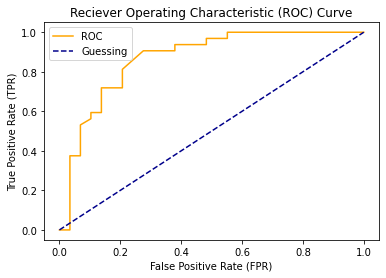

In [106]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    '''
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    '''
    # Plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot the line with no predictive power (baseline)
    plt.plot([0,1],[0,1], color='darkblue', linestyle='--', label='Guessing')
    
    # Customize the plot
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Reciever Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr)

In [107]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

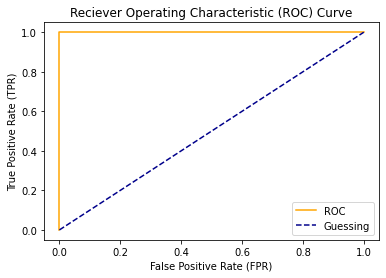

In [108]:
# Plot perfect ROC curve and AUC score

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

In [109]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
In essence, giving you an idea of where the model is getting confused.

In [110]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [111]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=['Actual Labels'],
           colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [112]:
23+6+6+26

61

In [113]:
len(X_test)

61

In [114]:
# HOW TO INSTALL A CONDA PACKAGE FROM WITHIN A JUPYTER NOTEBOOK INTO THE CURRENT ENV
#import sys
#!conda install --yes --prefix {sys.prefix} seaborn

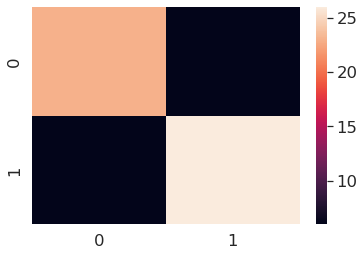

In [115]:
# Make our confusion matrix more visual with Seaborn's heatmap
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

In [116]:
# There's a new method to visualize confusion matrices in sklearn called ConfusionMatrixDisplay and is available from version 1.0 up 

import sklearn
sklearn.__version__

'1.0.2'

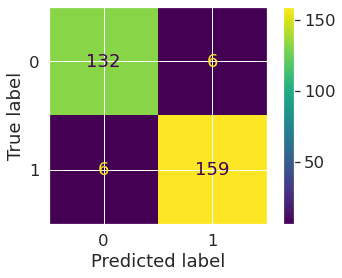

In [117]:
from sklearn.metrics import ConfusionMatrixDisplay

# We can use the ConfusionMatrixDisplay directly with the estimator and using all our data or a specific split (defining X and y parameters)
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

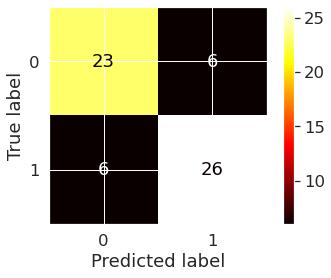

In [118]:
# We can also use it on a particular set of predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds, cmap='hot');

**Classification Report**

- Precision: Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
- Recall: Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
- F1 score: A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
- Support: The number of samples each metric was calculated on.

- Accuracy: The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
- Macro avg: Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
- Weighted avg: Short for weighted average, the weighted average precission, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. (e.g. will give a high value when one class out performs another due too having more samples).

In [119]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [120]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # Only one positive case

disease_preds = np.zeros(10000) # model predicts every cas as 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

/home/dav/Documents/Education/ML_and_DS/Udemy_Course/sample_project/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dav/Documents/Education/ML_and_DS/Udemy_Course/sample_project/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dav/Documents/Education/ML_and_DS/Udemy_Course/sample_project/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samp

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
The ones we're going to cover are:
 1. R² or coefficient of determination
 2. Mean absolute error (MAE)
 3. Mean squared error (MSE)

In [121]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis=1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [122]:
model.score(X_test, y_test)

0.8066196804802649

In [123]:
model.score(X_train, y_train)

0.9736828565983116

In [124]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [125]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [127]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [128]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [129]:
r2_score(y_true=y_test, y_pred=y_test)

1.0

In [130]:
reg_preds = model.predict(X_test)
r2_score(y_true=y_test, y_pred=reg_preds)

0.8066196804802649

**Mean Absolute Error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

It gives you you an idea of how wrong your model predictions are.

In [131]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, reg_preds)
mae

0.3265721842781009

In [132]:
# MAE takes the average of the absolute value of the differences
df = pd.DataFrame(data={'Actual Values': y_test, 'Predicted Values': reg_preds})
df['Differences'] = df['Predicted Values'] - df['Actual Values']
df.head(10)

,Actual Values,Predicted Values,Differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.654970,0.067970
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


**Mean Squared Error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [133]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, reg_preds)
mse

0.2534073069137548

In [134]:
df['Squared_Differences'] = np.square(df['Differences'])
df.head()

,Actual Values,Predicted Values,Differences,Squared_Differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [135]:
df['Squared_Differences'].mean()

0.253407306913755

In [142]:
df_large_error = df.copy()
df_large_error.iloc[0]['Squared_Differences'] = 16
df_large_error.head()

,Actual Values,Predicted Values,Differences,Squared_Differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [143]:
df_large_error.iloc[1:100] = 20
df_large_error

,Actual Values,Predicted Values,Differences,Squared_Differences
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [144]:
# Calculate MSE with large error
df_large_error['Squared_Differences'].mean()

0.7333540351264827